In [1]:
import numpy as np
import scipy
import librosa, librosa.display
print(librosa.__version__)
import matplotlib.pyplot as plt
#render plot option - matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib widget
#select a different color-scheme for the plots
import matplotlib.style as ms
import pandas as pd
ms.use("seaborn-v0_8")  
import IPython.display as Ipd

0.10.1


(421888,)
9.567


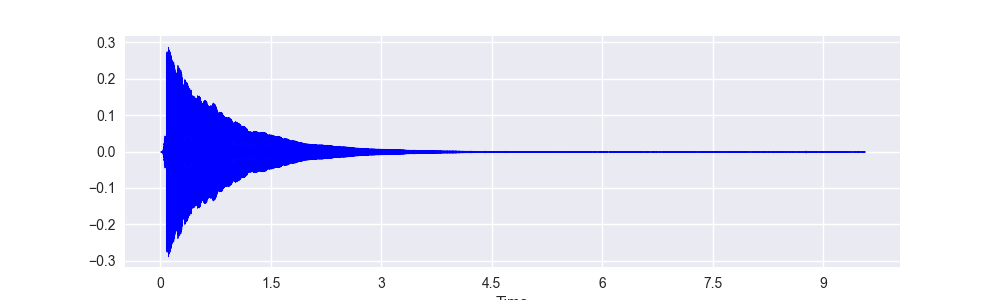

In [2]:
sample_name = 'G4-circular'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-2.wav'
sr = 44100 # sampling rate
signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=signal, sr=sr, color="blue")
Ipd.Audio(signal, rate=sr) # play audio

[Text(0.5, 1.0, 'MFCC')]

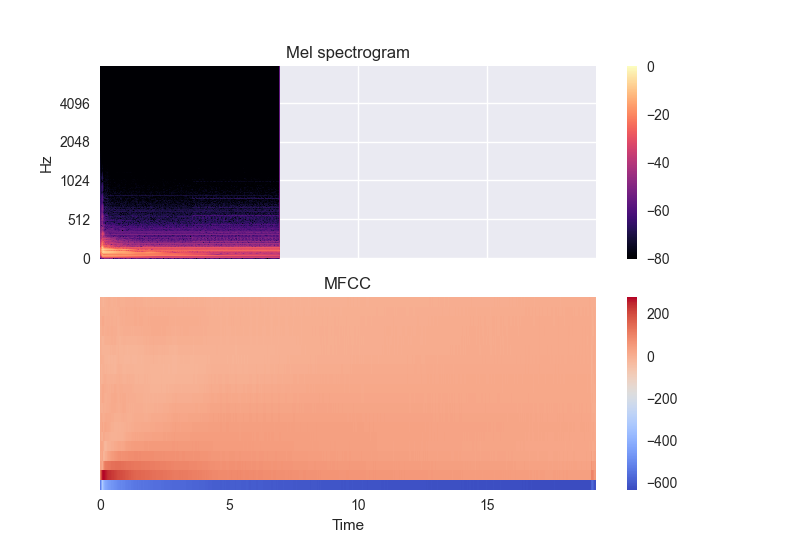

In [135]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])

fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

Calculate RMS

[Text(0.5, 1.0, 'log Power spectrogram')]

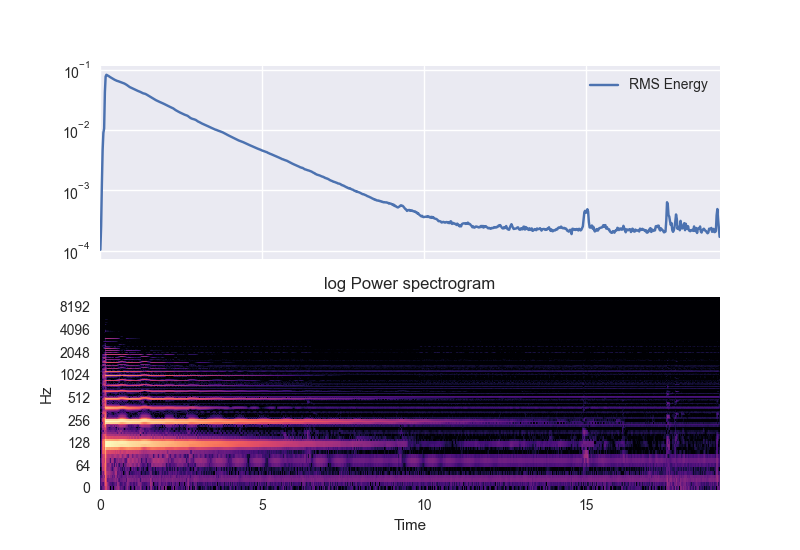

In [3]:
S, phase = librosa.magphase(librosa.stft(signal))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

Spectral centroid

[Text(0.5, 1.0, 'log Power spectrogram')]

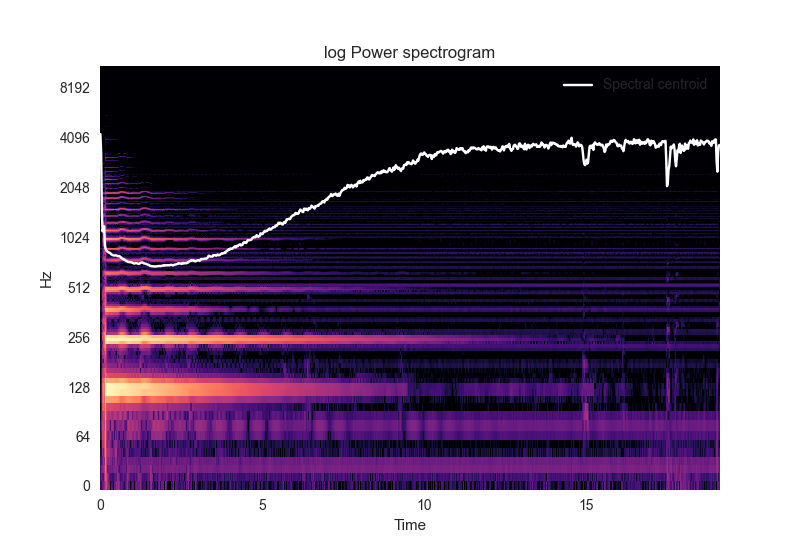

In [4]:
cent = librosa.feature.spectral_centroid(y=signal, sr=sr)

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

Spectral bandwidth

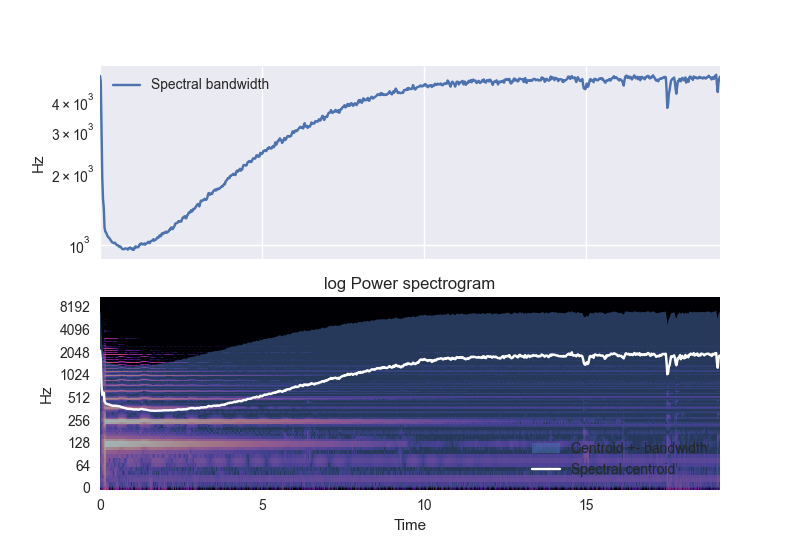

In [5]:
spec_bw = librosa.feature.spectral_bandwidth(y=signal, sr=sr)

S, phase = librosa.magphase(librosa.stft(y=signal))
librosa.feature.spectral_bandwidth(S=S)

freqs, times, D = librosa.reassigned_spectrogram(signal, fill_nan=True)
librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

Spectral contrast

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

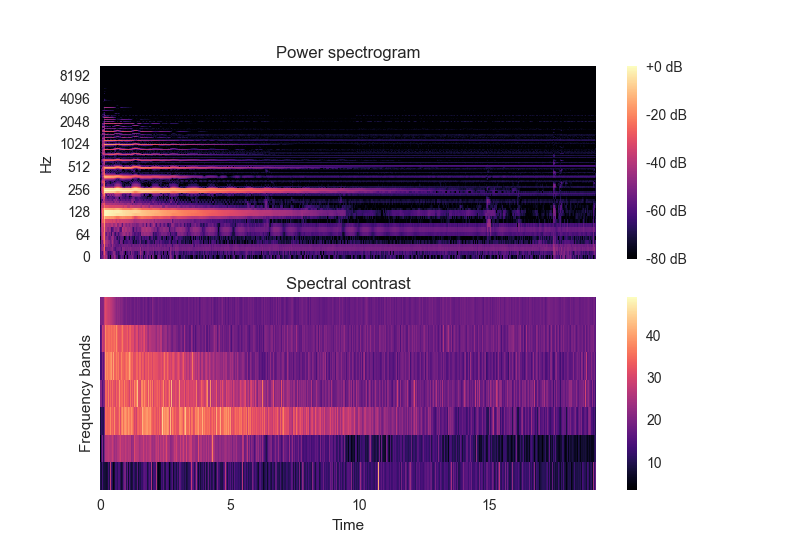

In [6]:
S = np.abs(librosa.stft(signal))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                 y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

Spectral flatness

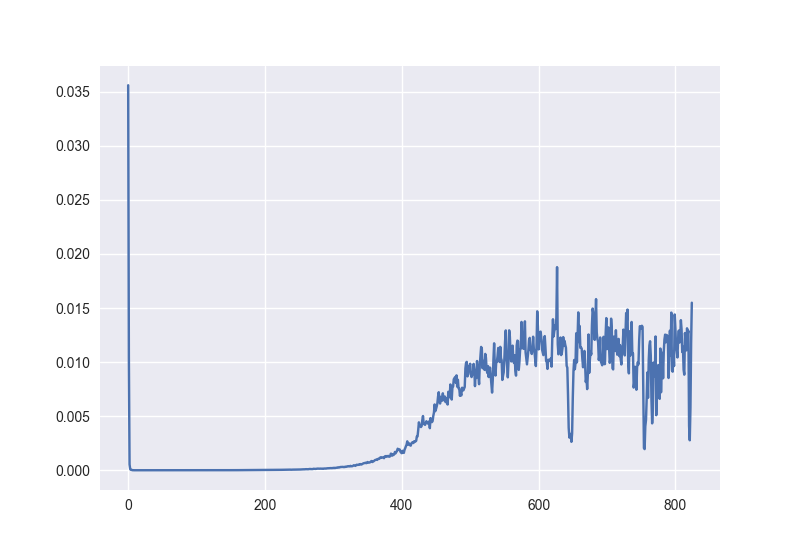

In [7]:
flatness = librosa.feature.spectral_flatness(y=signal)
fig, ax = plt.subplots()
ax.plot(flatness[0])

Spectral rolloff

[Text(0.5, 1.0, 'log Power spectrogram')]

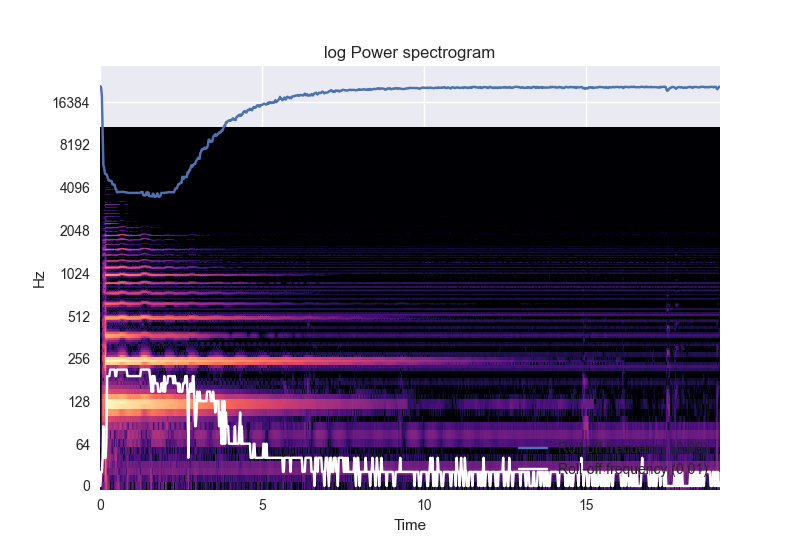

In [8]:
# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=signal, sr=sr)
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr, roll_percent=0.99)
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=signal, sr=sr, roll_percent=0.01)

S, phase = librosa.magphase(librosa.stft(signal))
librosa.feature.spectral_rolloff(S=S, sr=sr)

# With a higher roll percentage:
librosa.feature.spectral_rolloff(y=signal, sr=sr, roll_percent=0.95)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

Poly features

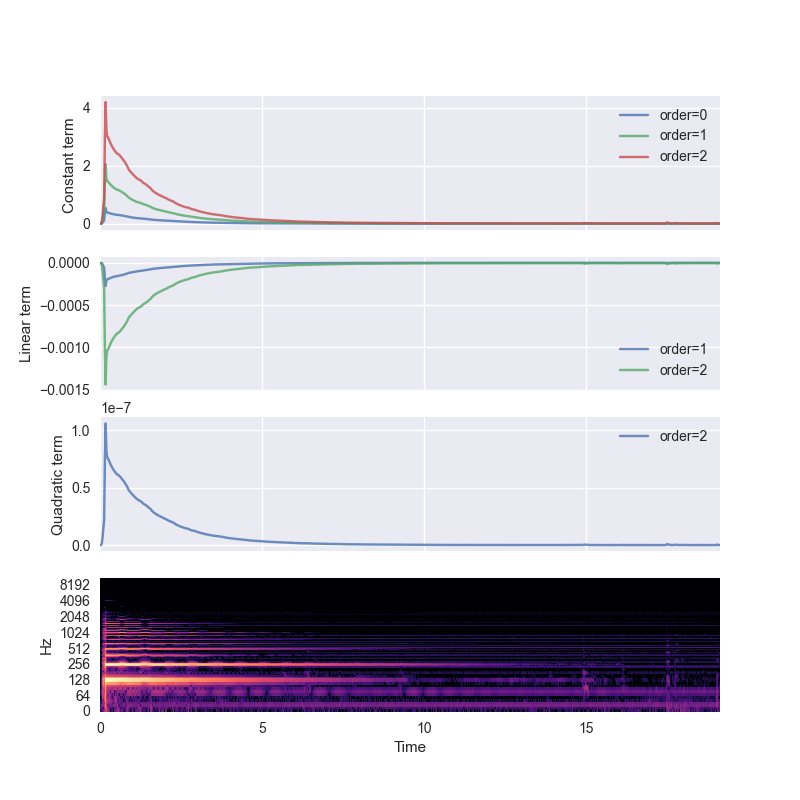

In [9]:
S = np.abs(librosa.stft(signal))

p0 = librosa.feature.poly_features(S=S, order=0)
p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(S=S, order=2)

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

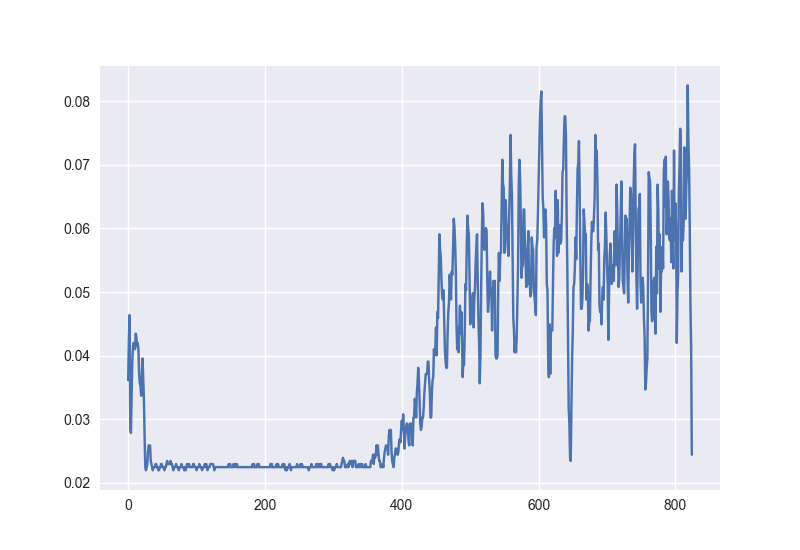

In [10]:
zero_crossing = librosa.feature.zero_crossing_rate(signal)
fig, ax = plt.subplots()
ax.plot(zero_crossing[0])

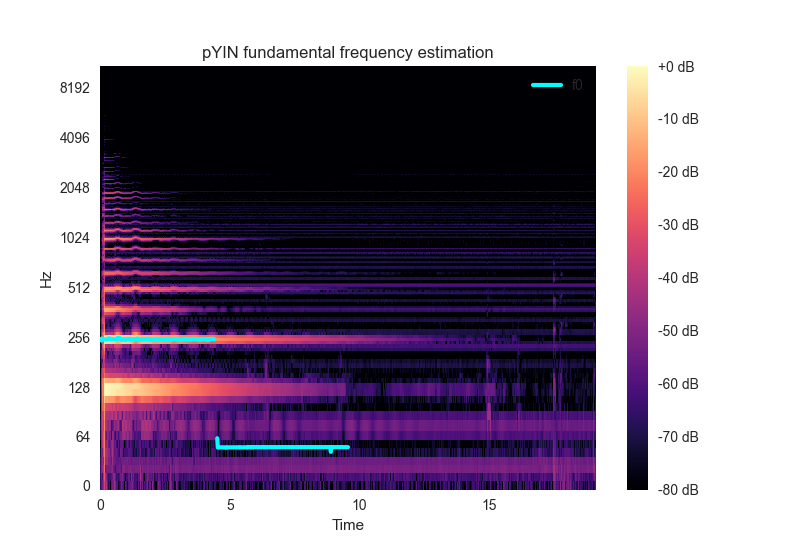

In [11]:
f0, voiced_flag, voiced_probs = librosa.pyin(signal,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('C1'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0, sr=sr)

D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

[Text(0, 0.5, 'Harmonics')]

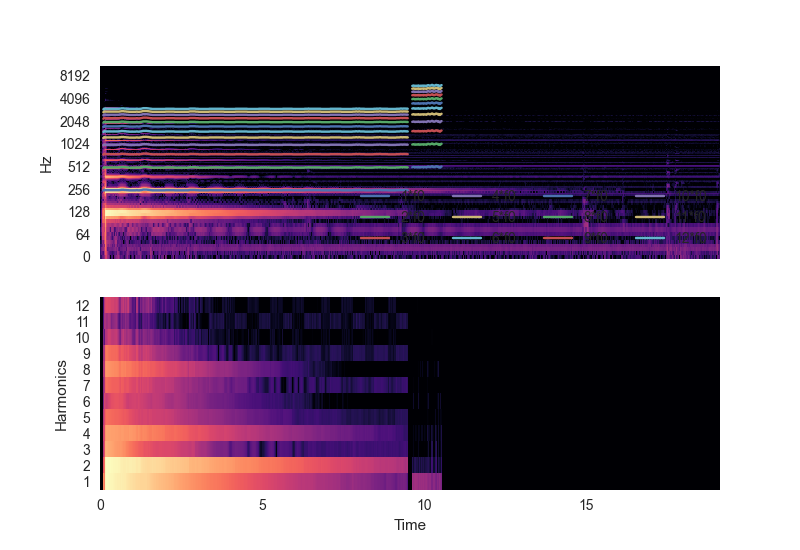

In [12]:
f0, voicing, voicing_p = librosa.pyin(y=signal, sr=sr, fmin=200, fmax=700)
S = np.abs(librosa.stft(signal))
freqs = librosa.fft_frequencies(sr=sr)
harmonics = np.arange(1, 13)
f0_harm = librosa.f0_harmonics(S, freqs=freqs, f0=f0, harmonics=harmonics)

fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
times = librosa.times_like(f0)
for h in harmonics:
    ax[0].plot(times, h * f0, label=f"{h}*f0")
ax[0].legend(ncols=4, loc='lower right')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(f0_harm, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[1].set_yticks(harmonics-1)
ax[1].set_yticklabels(harmonics)
ax[1].set(ylabel='Harmonics')

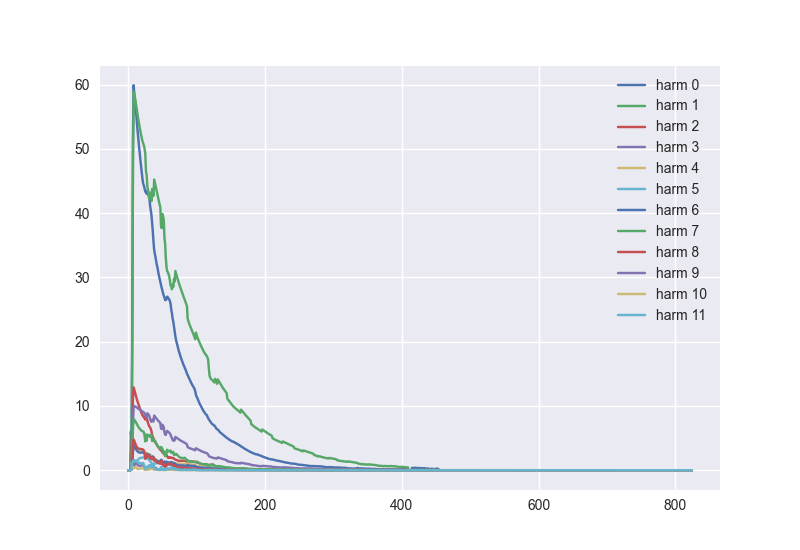

In [13]:
fig, ax = plt.subplots()
for i in range(12):
    ax.plot(f0_harm[i], label=f'harm {i}')
ax.legend()

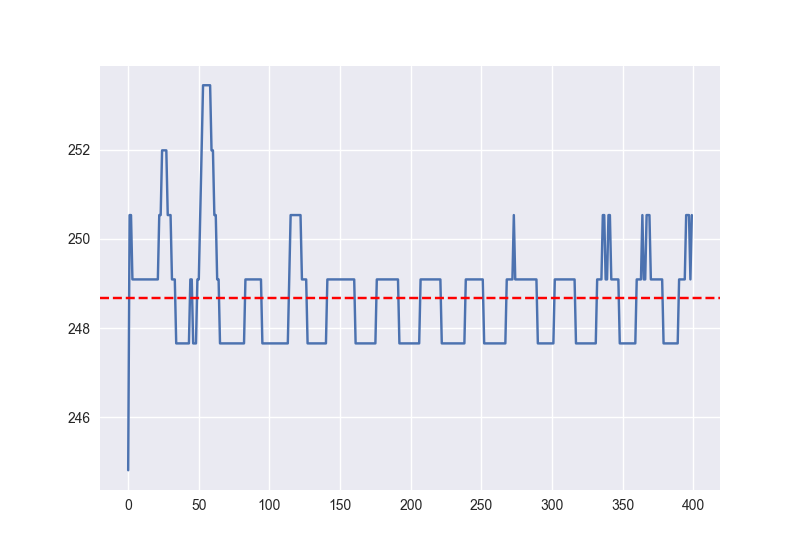

In [14]:
freq = f0[~np.isnan(f0)]
mean_f0 = freq[:400].mean()
fig, ax = plt.subplots()
ax.plot(freq[:400])
ax.axhline(mean_f0, linestyle='--', color='r')
central_harmonics = harmonics * mean_f0

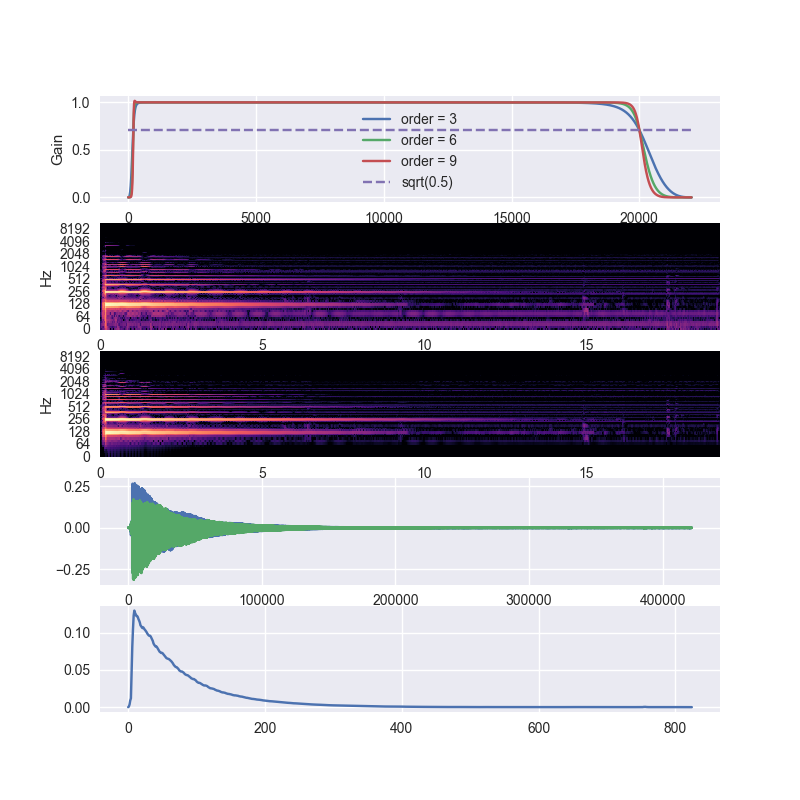

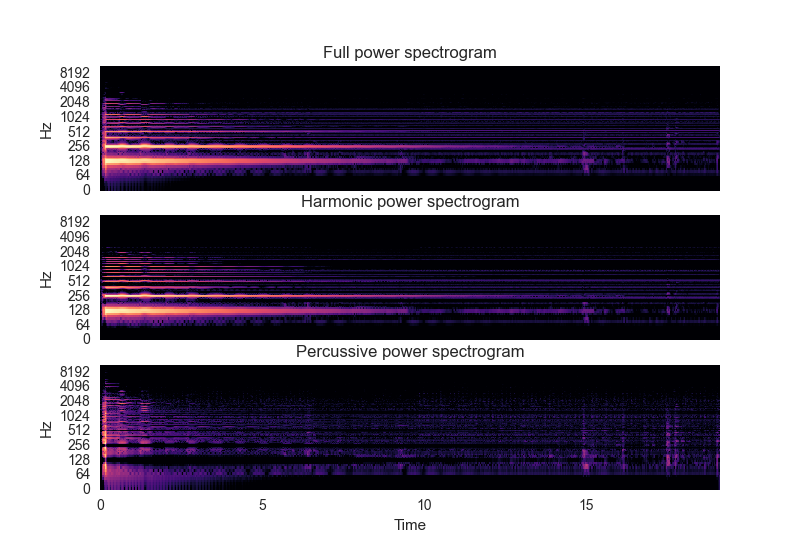

In [15]:
from scipy.signal import butter, lfilter
from scipy.signal import freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

filter_width = 100
harmonic = 1

# Sample rate and desired cutoff frequencies (in Hz).
fs = sr
lowcut = 200 # filtering out background noise
highcut = 20000

# Plot the frequency response for a few different orders.
y = butter_bandpass_filter(signal, lowcut, highcut, sr, order=6) # filtered signal
S = np.abs(librosa.stft(y)) # spectrum
fig, ax = plt.subplots(nrows=5, figsize=(8, 8))
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, fs=fs, worN=2000)
    ax[0].plot(w, abs(h), label="order = %d" % order)

ax[0].plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Gain')
ax[0].grid(True)
ax[0].legend(loc='best')
S = np.abs(librosa.stft(signal)) # spectrum
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[1])
S = np.abs(librosa.stft(y)) # spectrum
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[2])
ax[3].plot(signal, label='Original signal')
ax[3].plot(y, label='Filtered signal (%g Hz)' % central_harmonics[harmonic])
y_rms = librosa.feature.rms(y=y) # amplitude envelope
ax[4].plot(y_rms[0])



# Harmonic-percussive source separation
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D, kernel_size=300, margin=1.0)
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),
                                                       ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic power spectrogram')
ax[1].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive power spectrogram')

signal_harmonic = librosa.griffinlim(H)

In [16]:
samples = librosa.frames_to_samples(y_rms[0])
times = librosa.times_like(rms)
samples_indexes = librosa.time_to_samples(times)
samples_indexes[100]

51200

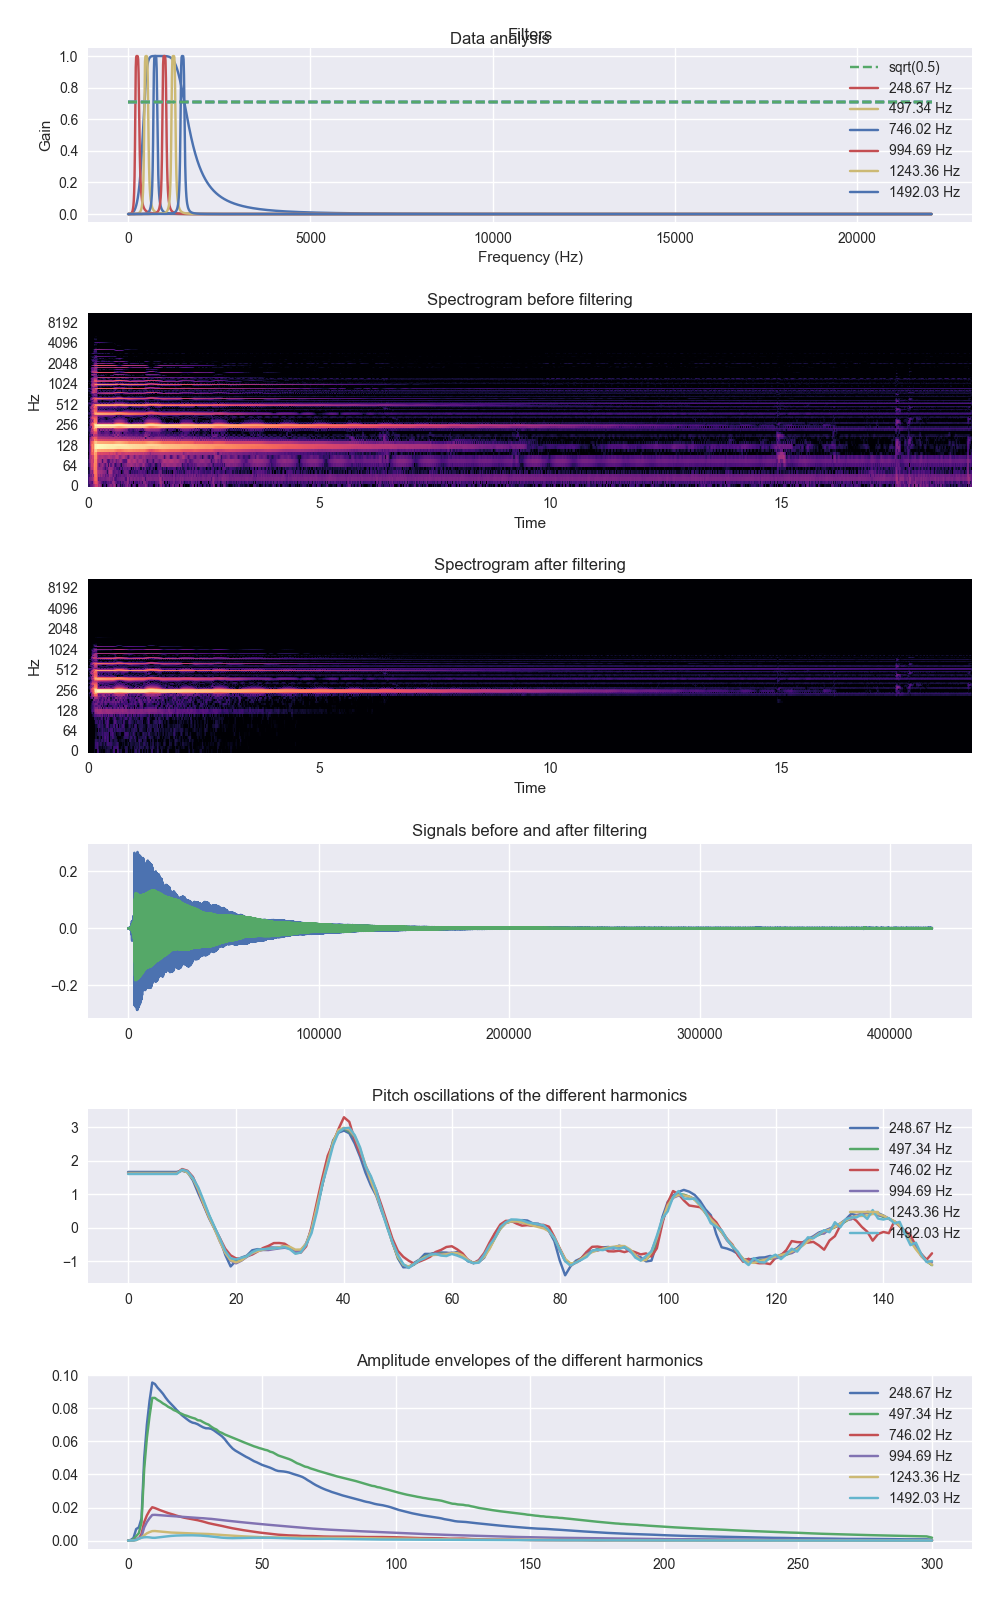

In [28]:
# filtering harmonics and extracting pitch and amplitude envelopes

N_harmonics = 6
# cut signal
signal_harmonic = signal[samples_indexes[0]:samples_indexes[300]]
filter_width = 50

lowcut = central_harmonics[1] - filter_width # filtering out background noise
highcut = central_harmonics[N_harmonics-1] + filter_width

# Plot the frequency response for a few different orders.
y = butter_bandpass_filter(signal, lowcut, highcut, sr, order=6) # filtered signal
S = np.abs(librosa.stft(y)) # spectrum

fig, ax = plt.subplots(nrows=6, figsize=(10, 16))
b, a = butter_bandpass(lowcut, highcut, fs, order=3)
w, h = freqz(b, a, fs=fs, worN=2000)
ax[0].plot(w, abs(h))

ax[0].plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Gain')
ax[0].grid(True)
ax[0].legend(loc='best')
S = np.abs(librosa.stft(signal)) # spectrum
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[1])
S = np.abs(librosa.stft(y)) # spectrum
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[2])
ax[3].plot(signal, label='Original signal')
ax[3].plot(y, label='Filtered signal (%g Hz)' % central_harmonics[harmonic])

harms = range(N_harmonics)
for harm in harms:

    harmonic = harm
    
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = sr
    lowcut = central_harmonics[harmonic] - filter_width
    highcut = central_harmonics[harmonic] + filter_width
    
    # Filter signal
    y = butter_bandpass_filter(signal_harmonic, lowcut, highcut, sr, order=3) # filtered signal
    S = np.abs(librosa.stft(y)) # spectrum
    y_freq = librosa.yin(y, sr=sr, fmin=50, fmax=880, frame_length=2048) # central frequency 
    y_rms = librosa.feature.rms(y=y) # amplitude envelope

    # remove outliers by interpolation with the rolling average
    df = pd.DataFrame({'Data':y_freq[20:170]})
    r = df.rolling(window=10)
    mps_up, mps_low = r.mean() + 3 * r.std(), r.mean()  -  3 * r.std()
    df.loc[~df['Data'].between(mps_low.Data, mps_up.Data), 'Data'] = np.NaN
    df['Data'] = df['Data'].bfill()
    y_freq_clean = (df['Data'].values - df['Data'].values.mean()) / df['Data'].values.std()
    
    ax[4].plot(y_freq_clean, label=f'{central_harmonics[harmonic]:.2f} Hz')
    ax[4].legend(loc='upper right')

    ax[5].plot(y_rms[0], label=f'{central_harmonics[harmonic]:.2f} Hz')
    ax[5].legend(loc='upper right')
    
    b, a = butter_bandpass(lowcut, highcut, fs, order=3)
    w, h = freqz(b, a, fs=fs, worN=2000)
    ax[0].plot(w, abs(h), label=f'{central_harmonics[harmonic]:.2f} Hz')
    ax[0].plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--')
    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('Gain')
    ax[0].grid(True)
    ax[0].legend(loc='upper right')

ax[0].set_title('Filters')
ax[1].set_title('Spectrogram before filtering')
ax[2].set_title('Spectrogram after filtering')
ax[3].set_title('Signals before and after filtering')
ax[4].set_title('Pitch oscillations of the different harmonics')
ax[5].set_title('Amplitude envelopes of the different harmonics')

fig.tight_layout(pad=2.0)
fig.suptitle('Data analysis')
plt.show()

# Import libraries

In [127]:
import numpy as np
import scipy
import librosa, librosa.display
print(librosa.__version__)
import matplotlib.pyplot as plt
#render plot option - matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib widget
#select a different color-scheme for the plots
import matplotlib.style as ms
import pandas as pd
ms.use("seaborn-v0_8")
import IPython.display as Ipd

0.10.1


# Load audio track

(423424,)
9.601


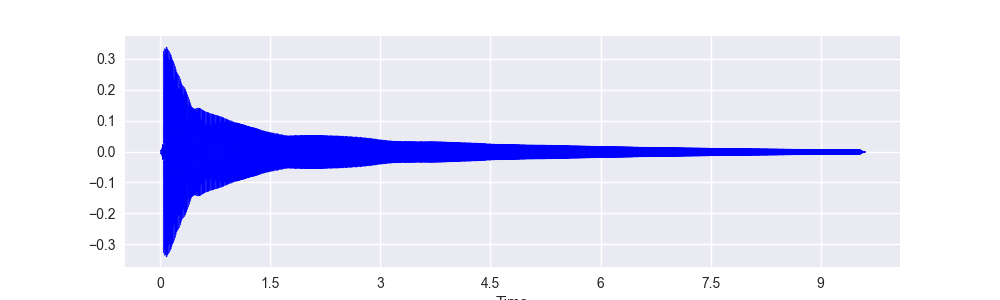

In [128]:
sample_name = 'E1-circular'
filepath = f'data-processed/{sample_name}/{sample_name}-sound-2.wav'
sr = 44100 # sampling rate
signal, sr = librosa.load(filepath, sr=sr, mono=False)
print(signal.shape)
print('{:2.3f}'.format(librosa.samples_to_time(signal.shape[0], sr=sr)))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=signal, sr=sr, color="blue")
Ipd.Audio(signal, rate=sr) # play audio

# Extract harmonics

[Text(0, 0.5, 'Harmonics')]

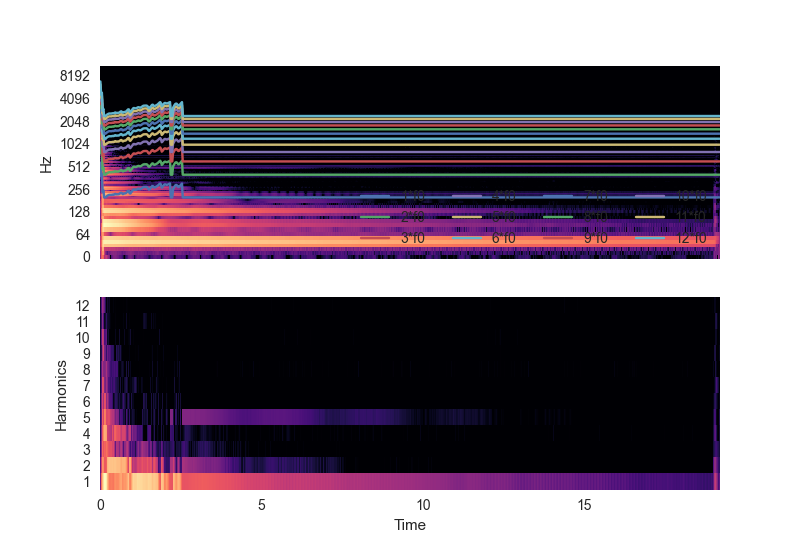

In [129]:
f0, voicing, voicing_p = librosa.pyin(y=signal, sr=sr, fmin=200, fmax=700)

f0 = librosa.yin(y=signal, sr=sr, fmin=200, fmax=700)
S = np.abs(librosa.stft(signal))
freqs = librosa.fft_frequencies(sr=sr)
harmonics = np.arange(1, 13)
f0_harm = librosa.f0_harmonics(S, freqs=freqs, f0=f0, harmonics=harmonics)

fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
times = librosa.times_like(f0)
for h in harmonics:
    ax[0].plot(times, h * f0, label=f"{h}*f0")
ax[0].legend(ncols=4, loc='lower right')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(f0_harm, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[1].set_yticks(harmonics-1)
ax[1].set_yticklabels(harmonics)
ax[1].set(ylabel='Harmonics')

# Clean audio track

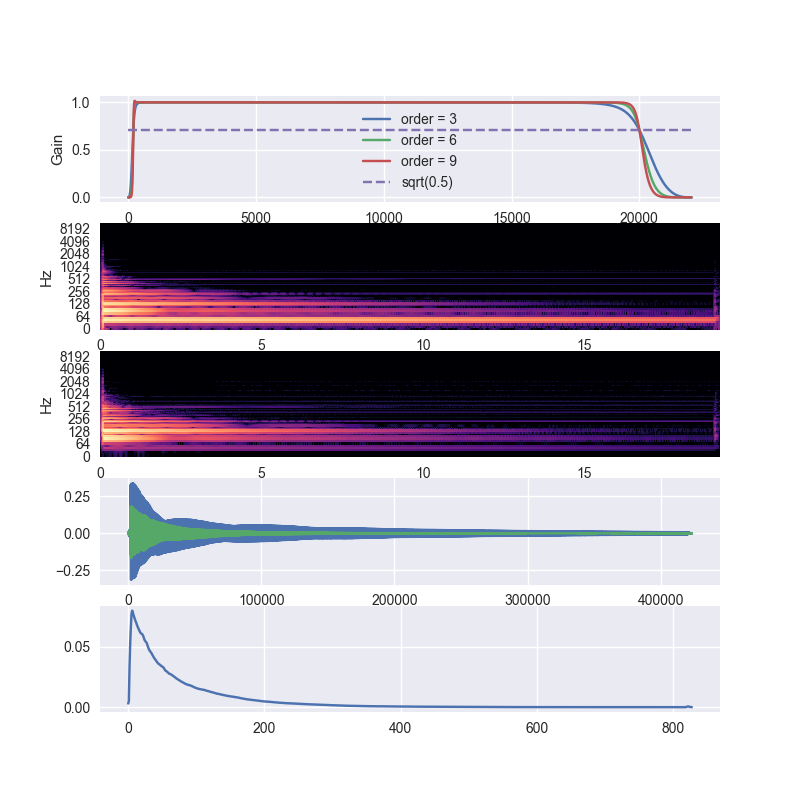

In [130]:
from scipy.signal import butter, lfilter
from scipy.signal import freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = sr
lowcut = 200 # filtering out background noise
highcut = 20000

# Plot the frequency response for a few different orders.
y = butter_bandpass_filter(signal, lowcut, highcut, sr, order=6) # filtered signal
S = np.abs(librosa.stft(y)) # spectrum
fig, ax = plt.subplots(nrows=5, figsize=(8, 8))
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, fs=fs, worN=2000)
    ax[0].plot(w, abs(h), label="order = %d" % order)

ax[0].plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Gain')
ax[0].grid(True)
ax[0].legend(loc='best')
S = np.abs(librosa.stft(signal)) # spectrum
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[1])
S = np.abs(librosa.stft(y)) # spectrum
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[2])
ax[3].plot(signal, label='Original signal')
ax[3].plot(y)
y_rms = librosa.feature.rms(y=y) # amplitude envelope
ax[4].plot(y_rms[0])

# Find central frequency

In [131]:
f0[np.argmax(y_rms[0])]
k = 5 # average of the k frequencies with max amplitudes
mean_f0 = np.mean(f0[np.argpartition(y_rms[0], len(y_rms[0]) - k)[-k:]])
central_harmonics = harmonics * mean_f0

In [132]:
# get samples from RMS
times = librosa.times_like(y_rms)
samples_indexes = librosa.time_to_samples(times)
samples_indexes[100]

51200

# Compute pitch and amplitude envelopes for each harmonic

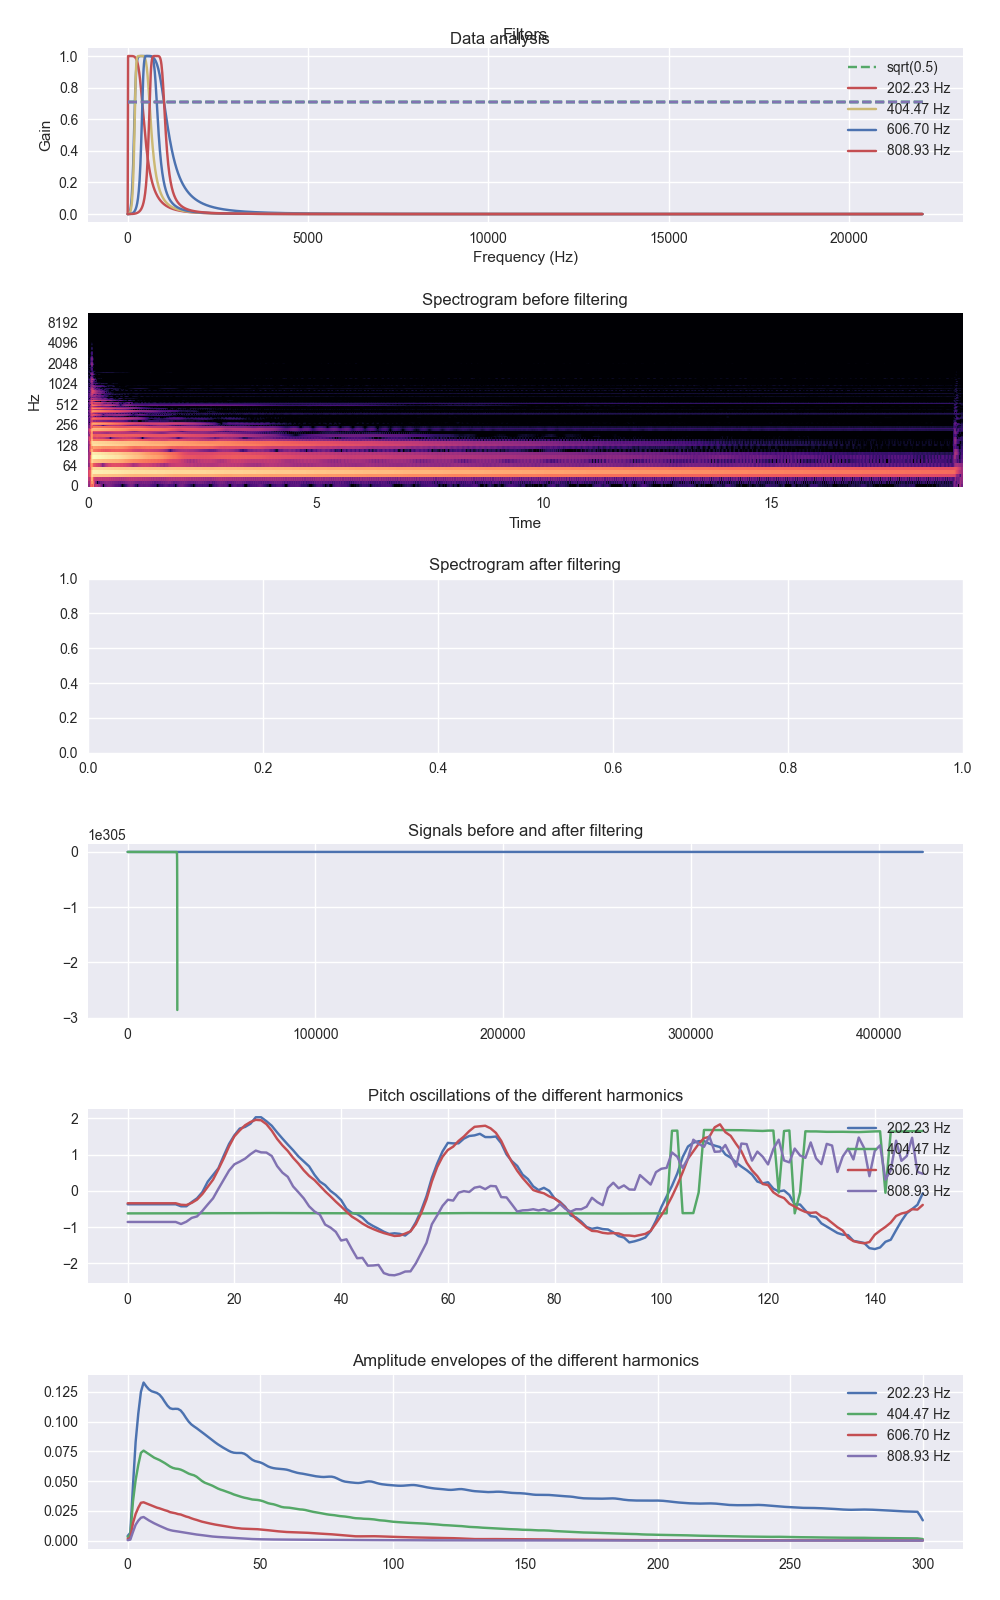

In [133]:
# filtering harmonics and extracting pitch and amplitude envelopes

N_harmonics = 4
# cut signal
signal_harmonic = signal[samples_indexes[0]:samples_indexes[300]]
filter_width = 200

lowclowcutut = central_harmonics[1] - filter_width # filtering out background noise
highcut = central_harmonics[N_harmonics-1] + filter_width


# Plot the frequency response for a few different orders.
signal = signal[~np.isnan(signal)]
signal = signal[signal != -np.inf]
signal = signal[signal != np.inf]
y = butter_bandpass_filter(signal, lowcut, highcut, sr, order=6) # filtered signal
y = y[~np.isnan(y)]
y = y[y != -np.inf]
y = y[y != np.inf]
S = np.abs(librosa.stft(y)) # spectrum

fig, ax = plt.subplots(nrows=6, figsize=(10, 16))
b, a = butter_bandpass(lowcut, highcut, fs, order=3)
w, h = freqz(b, a, fs=fs, worN=2000)
ax[0].plot(w, abs(h))

ax[0].plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Gain')
ax[0].grid(True)
ax[0].legend(loc='best')
S = np.abs(librosa.stft(signal)) # spectrum
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[1])
S = np.abs(librosa.stft(y)) # spectrum
#librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
#                         x_axis='time', y_axis='log', ax=ax[2])
ax[3].plot(signal, label='Original signal')
ax[3].plot(y, label='Filtered signal (%g Hz)' % central_harmonics[harmonic])

harms = range(N_harmonics)
for harm in harms:

    harmonic = harm
    
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = sr
    lowcut = central_harmonics[harmonic] - filter_width
    highcut = central_harmonics[harmonic] + filter_width
    
    # Filter signal
    y = butter_bandpass_filter(signal_harmonic, lowcut, highcut, sr, order=3) # filtered signal
    y = y[~np.isnan(y)]
    y = y[y != -np.inf]
    S = np.abs(librosa.stft(y)) # spectrum
    y_freq = librosa.yin(y, sr=sr, fmin=50, fmax=880, frame_length=2048) # central frequency 
    y_rms = librosa.feature.rms(y=y) # amplitude envelope

    # remove outliers by interpolation with the rolling average
    df = pd.DataFrame({'Data':y_freq[20:170]})
    #df = pd.DataFrame({'Data':y_freq})
    r = df.rolling(window=10)
    mps_up, mps_low = r.mean() + 3 * r.std(), r.mean()  -  3 * r.std()
    df.loc[~df['Data'].between(mps_low.Data, mps_up.Data), 'Data'] = np.NaN
    df['Data'] = df['Data'].bfill()
    y_freq_clean = (df['Data'].values - df['Data'].values.mean()) / df['Data'].values.std()
    
    ax[4].plot(y_freq_clean, label=f'{central_harmonics[harmonic]:.2f} Hz')
    ax[4].legend(loc='upper right')

    ax[5].plot(y_rms[0], label=f'{central_harmonics[harmonic]:.2f} Hz')
    ax[5].legend(loc='upper right')
    
    b, a = butter_bandpass(lowcut, highcut, fs, order=3)
    w, h = freqz(b, a, fs=fs, worN=2000)
    ax[0].plot(w, abs(h), label=f'{central_harmonics[harmonic]:.2f} Hz')
    ax[0].plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--')
    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('Gain')
    ax[0].grid(True)
    ax[0].legend(loc='upper right')

ax[0].set_title('Filters')
ax[1].set_title('Spectrogram before filtering')
ax[2].set_title('Spectrogram after filtering')
ax[3].set_title('Signals before and after filtering')
ax[4].set_title('Pitch oscillations of the different harmonics')
ax[5].set_title('Amplitude envelopes of the different harmonics')

fig.tight_layout(pad=2.0)
fig.suptitle('Data analysis')
plt.show()